In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:

df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the info function we get to know that only the bmi column has missing values that we need to handle either we can drop it or handle those values .

Need to encode data beacuse Machine learning models require all input and output variables to be numeric.

This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

In [ ]:
df['hypertension'] = df['hypertension'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')

df['stroke'] = df['stroke'].astype('object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


In this describe feature we will use std to find what features we can drop lower the std means more values or simlair and if we it is 0 impiles that all values are same .
High std means less confidence in prediction

Link for examples of std https://www.statology.org/standard-deviation-real-life-examples/

In [ ]:
df.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


From the below value counts function. It gives stroke count i.e. People who got a stroke or not.

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

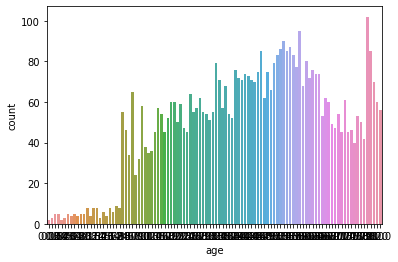

In [ ]:
sns.countplot(data=df,x='age')

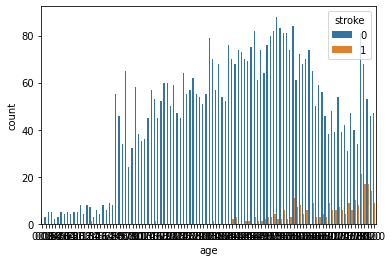

In [ ]:
sns.countplot(x = df.age, hue = df.stroke,)

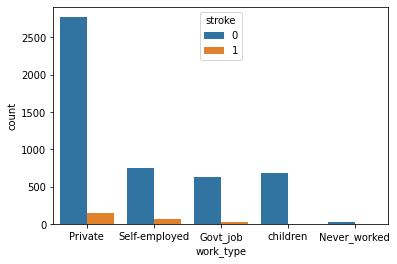

In [ ]:
sns.countplot(x = df.work_type, hue = df.stroke,)

Below three code blocks are of no use do no run it

In [ ]:
sns.replot(df['stroke'],x='gender')

In [ ]:
sns.relplot(
    data=df,
    x="stroke", y="gender",
)

In [ ]:
plt.bar(df['stroke'], df['gender'], color ='maroon',
        width = 0.4)

Pie chart represenation of the people who have stroke or not

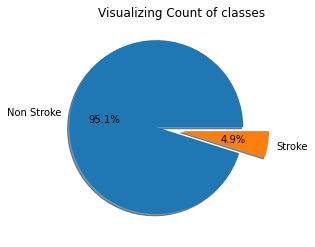

In [ ]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

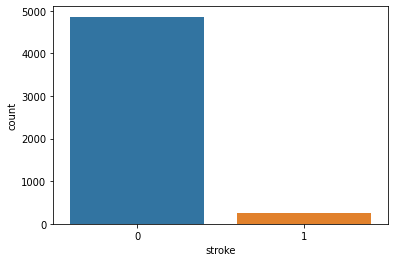

In [ ]:
sns.countplot(data=df,x='stroke')

sns.countplot(x = df.work_type, hue = df.stroke, palette="Blues")

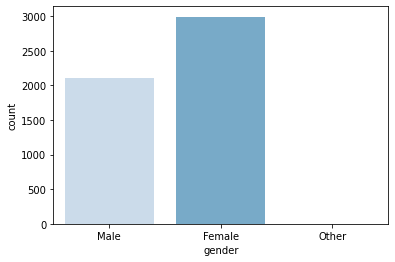

In [ ]:
sns.countplot(x = df.gender , palette="Blues")

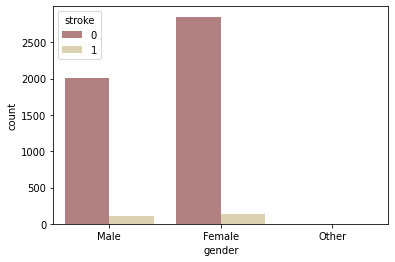

In [ ]:
sns.countplot(x = df.gender , hue = df.stroke, palette="pink")

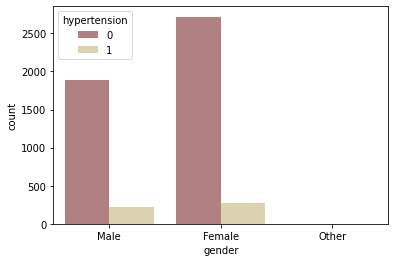

In [ ]:
sns.countplot(x = df.gender , hue = df.hypertension, palette="pink")

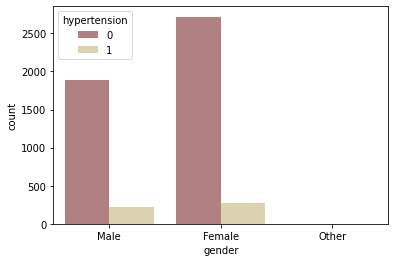

In [ ]:
sns.countplot(x = df.gender , hue = df.hypertension, palette="pink")

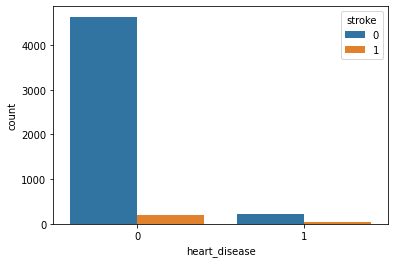

In [ ]:
sns.countplot(x = df.heart_disease, hue = df.stroke,)

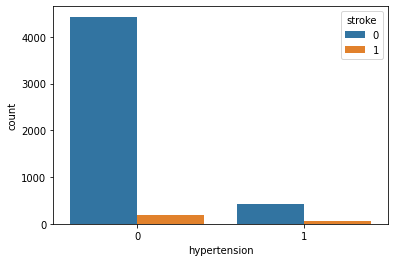

In [ ]:
sns.countplot(x = df.hypertension, hue = df.stroke,)

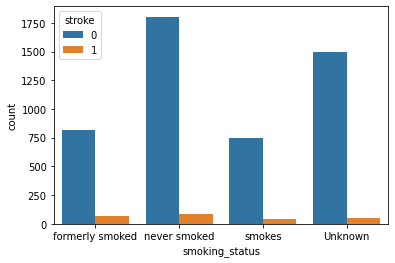

In [ ]:
sns.countplot(x = df.smoking_status, hue = df.stroke,)

Better understand the heat maps to explain it 

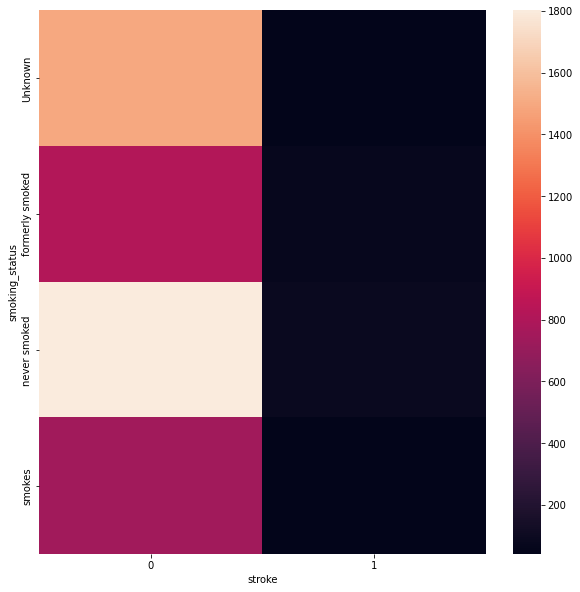

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(pd.crosstab(df['smoking_status'],df['stroke']))
plt.show()

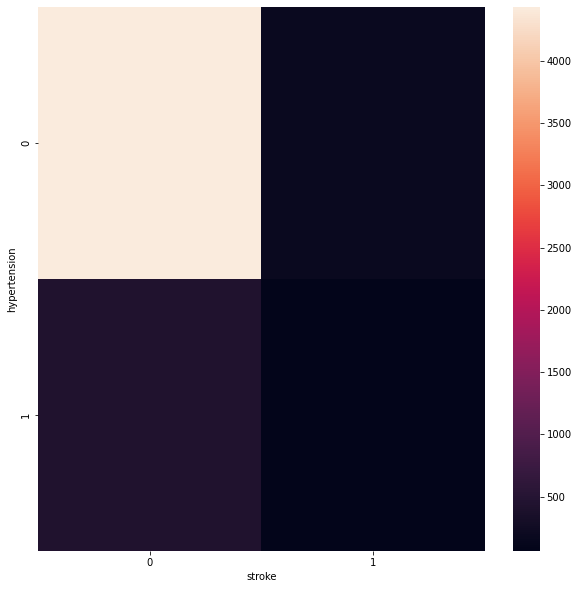

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(pd.crosstab(df['hypertension'],df['stroke']))
plt.show()


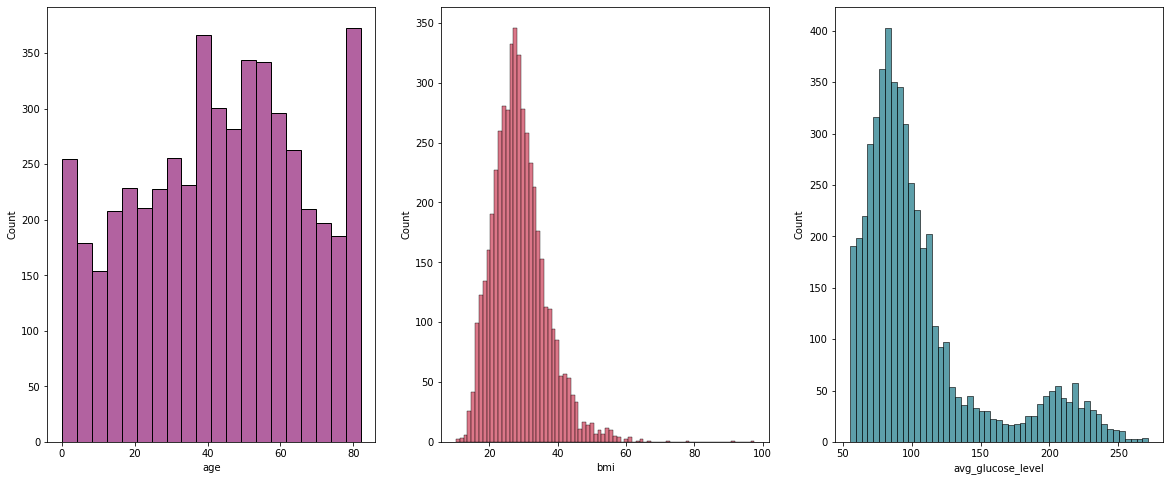

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
ax1 = sns.histplot(df.age, color=sns.color_palette('magma')[2])
plt.subplot(1, 3, 2)
ax2 = sns.histplot(df.bmi, color=sns.color_palette('flare')[2])
plt.subplot(1, 3, 3)
ax3 = sns.histplot(df.avg_glucose_level, color=sns.color_palette('viridis')[2])
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
plt.show()

In [ ]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,0,Urban,228.69,36.6,3,1
1,1,61.0,0,0,Yes,1,Rural,202.21,NaN,0,1
2,0,80.0,0,1,Yes,0,Rural,105.92,32.5,0,1
3,1,49.0,0,0,Yes,0,Urban,171.23,34.4,1,1
4,1,79.0,1,0,Yes,1,Rural,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,Yes,0,Urban,83.75,NaN,0,0
5106,1,81.0,0,0,Yes,1,Urban,125.20,40.0,0,0
5107,1,35.0,0,0,Yes,1,Rural,82.99,30.6,0,0
5108,0,51.0,0,0,Yes,0,Rural,166.29,25.6,3,0
